In [172]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../modules")
import PBD_analog
import matplotlib as mpl
plt.style.use("customstyle")
norm = mpl.colors.Normalize(vmin=0, vmax=1)
from matplotlib import colors
from scipy.misc import derivative
from functools import partial

We have the rates 
$$ \tilde\lambda (\lambda_1, \lambda_2, \lambda_3, \mu_1, \mu_2) = (1-\pi) \lambda_1 \quad \text{and} \quad \tilde\mu  (\lambda_1, \lambda_2, \lambda_3, \mu_1, \mu_2)= \mu_1.$$
with 
$\pi = \frac{\lambda_2 + \lambda_3 + \mu_2}{2\lambda_3} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right)$.

Then naturally 
$$\frac{\partial \tilde\lambda}{\partial \lambda_1} = (1-\pi)$$
and 
$$\frac{\partial \tilde\lambda}{\partial \lambda_2} = -\frac{\partial \pi}{\partial \lambda_2} \lambda_1$$



Partial derivatives of $\pi$ (fun part):

\begin{align}
\frac{\partial \pi}{\partial \lambda_2} &= \frac{1}{2\lambda_3} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right) + \frac{\lambda_2+\lambda_3 + \mu_2}{2\lambda_3} \left( \frac{-\frac{8\lambda_3\mu_2}{(\lambda_2+\lambda_3+\mu_2)^3}}{2\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}} } \right) 
\\
&= \frac{\pi }{\Lambda} -  \frac{2\mu_2}{\Lambda^2 \sqrt{1-4\frac{\lambda_3\mu_2}{\Lambda^2}}}
\\ 
&= \frac{\pi}{\Lambda} - \frac{2\mu_2}{\Lambda \sqrt{\Lambda^2-4\lambda_3\mu_2}}.
\end{align}


With $\lambda_3$:
\begin{align}
\frac{\partial \pi}{\partial \lambda_3} &= \frac{1}{2}\frac{\lambda_3-(\lambda_2+\lambda_3+\mu_2)}{\lambda_3^2} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right) + \frac{\lambda_2 + \lambda_3 + \mu_2}{2\lambda_3} \times \left( -\frac{\partial u}{\partial \lambda_3} \frac{1}{2 \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}} \right) 
\end{align}
with $u =  1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}$. So 
\begin{align}
\frac{\partial u}{\partial \lambda_3} &= -4\frac{\mu_2 \Lambda^2 - 2\lambda_3\mu_2 \Lambda}{\Lambda^4} 
\\
& = -4\mu_2\frac{\lambda_2 + \mu_2 - \lambda_3}{\Lambda^3}
\end{align} 
then the partial derivatives of the probability $\pi$ reduces in 
\begin{align}
\frac{\partial \pi}{\partial \lambda_3} &= -\frac{\lambda_2+\mu_2}{2\lambda_3^2} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right) + \frac{\Lambda}{4\lambda_3} \frac{4\mu_2(\lambda_2+\mu_2-\lambda_3)}{\Lambda^3\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}} }
\\
& = -\frac{\lambda_2+\mu_2}{\Lambda\lambda_3} \pi + \frac{\mu_2}{\lambda_3\Lambda^2} \frac{\lambda_2+\mu_2-\lambda_3}{\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}}.
\end{align}

With $\mu_2$
\begin{align}
\frac{\partial \pi}{\partial \mu_2} = \frac{1}{2\lambda_3} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right) - \frac{\lambda_2+\lambda_3+\mu_2}{2\lambda_3} \frac{\partial u}{\partial \mu_2} \frac{1}{2\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}} }
\end{align}
with 
\begin{align}
\frac{\partial u}{\partial \mu_2} &= -4 \frac{\lambda_3 (\lambda_2+\lambda_3+\mu_2)^2 - 2\lambda_3\mu_2  (\lambda_2+\lambda_3+\mu_2)}{ (\lambda_2+\lambda_3+\mu_2)^4} 
\\ 
&= -4 \lambda_3 \frac{\lambda_2+\lambda_3-\mu_2}{\Lambda^3}
\end{align}
so 
\begin{align}
\frac{\partial \pi}{\partial \mu_2} &= \frac{\pi}{\Lambda} + \frac{\Lambda}{2\lambda_3}\times 4 \lambda_3 \frac{\lambda_2+\lambda_3-\mu_2}{\Lambda^3} \frac{1}{2\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}} }
\\ 
& = \frac{\pi}{\Lambda} + \frac{\lambda_2+\lambda_3-\mu_2}{\Lambda^2 \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}}.
\end{align}
We still have 
$$\frac{\partial \tilde\lambda}{\partial \mu_2} = -\frac{\partial \pi}{\partial \mu_2} \lambda_1.$$

In [173]:
# Python implementation 
def partial_birth_l1(l1, l2, l3, m1, m2):
    return 1 - PBD_analog.pi(l1,l2,l3,m1,m2)

def partial_pi_l2(l1,l2,l3,m1,m2):
    Lambda = l2+l3+m2
    return PBD_analog.pi(l1,l2,l3,m1,m2)/Lambda - 2*m2 / (Lambda*np.sqrt(Lambda**2 - 4*l3*m2))

def partial_birth_l2(l1,l2,l3,m1,m2):
    return -l1*partial_pi_l2(l1,l2,l3,m1,m2)

def partial_pi_l3(l1,l2,l3,m1,m2):
    Lambda = l2 + l3 + m2
    s = np.sqrt(1 - 4 * l3*m2 / (Lambda**2))
    return -0.5*(l2+m2)/l3**2 * (1-s) + m2 * (l2 + m2 - l3) / (Lambda**2 * l3 * s)

def partial_birth_l3(l1, l2,l3,m1,m2):
    return -l1 * partial_pi_l3(l1,l2,l3,m1,m2)

def partial_pi_m2(l1,l2,l3,m1,m2):
    Lambda = l2 + l3 + m2
    s = np.sqrt(1 - 4 * l3*m2 / (Lambda**2))
    return (1-s)/(2*l3) - (m2-l3-l2)/(Lambda**2 * s)

def partial_birth_m2(l1,l2,l3,m1,m2):
    return -l1*partial_pi_m2(l1,l2,l3,m1,m2)

def partial_birth_m1(l1, l2, l3, m1, m2):
    return 0.0

def jacobian_analog_bd(i_bd, i_pbd, l1, l2, l3, m1, m2):
    if i_bd == 0:
        partial_der = [partial_birth_l1, partial_birth_l2, partial_birth_l3, 
                        partial_birth_m1, partial_birth_m2]
        return partial_der[i_pbd](l1, l2, l3, m1, m2)
    elif i_bd == 1:
        if i_pbd == 3:
            return 1.0
        elif i_pbd in (0,1,2,4):
            return 0.0
    raise ValueError("i_bd must be 0 or 1 and i_pbd must be in [0,1,2,3,4].")

Checking the obtained values

d lambda / d l1
Analytical partial derivative : 0.8833829360685738
Numerical partial derivative  : 0.8833829360685858
d lambda / d l2
Analytical partial derivative : 0.015965148544765623
Numerical partial derivative  : 0.015965154559385852
d lambda / d l3
Analytical partial derivative : 0.01410333979624594
Numerical partial derivative  : 0.014103342434082511
d lambda / d m1
Analytical partial derivative : 0.0
Numerical partial derivative  : 0.0
d lambda / d m2
Analytical partial derivative : -0.12093718809915402
Numerical partial derivative  : -0.12093721280220793
d mu / d l1
Analytical partial derivative : 0.0
Numerical partial derivative  : 4.163336342344337e-14
d mu / d l2
Analytical partial derivative : 0.0
Numerical partial derivative  : -2.7755575615628914e-14
d mu / d l3
Analytical partial derivative : 0.0
Numerical partial derivative  : 0.0
d mu / d m1
Analytical partial derivative : 1.0
Numerical partial derivative  : 0.999999999999987
d mu / d m2
Analytical partial derivative

Text(0, 0.5, 'mu')

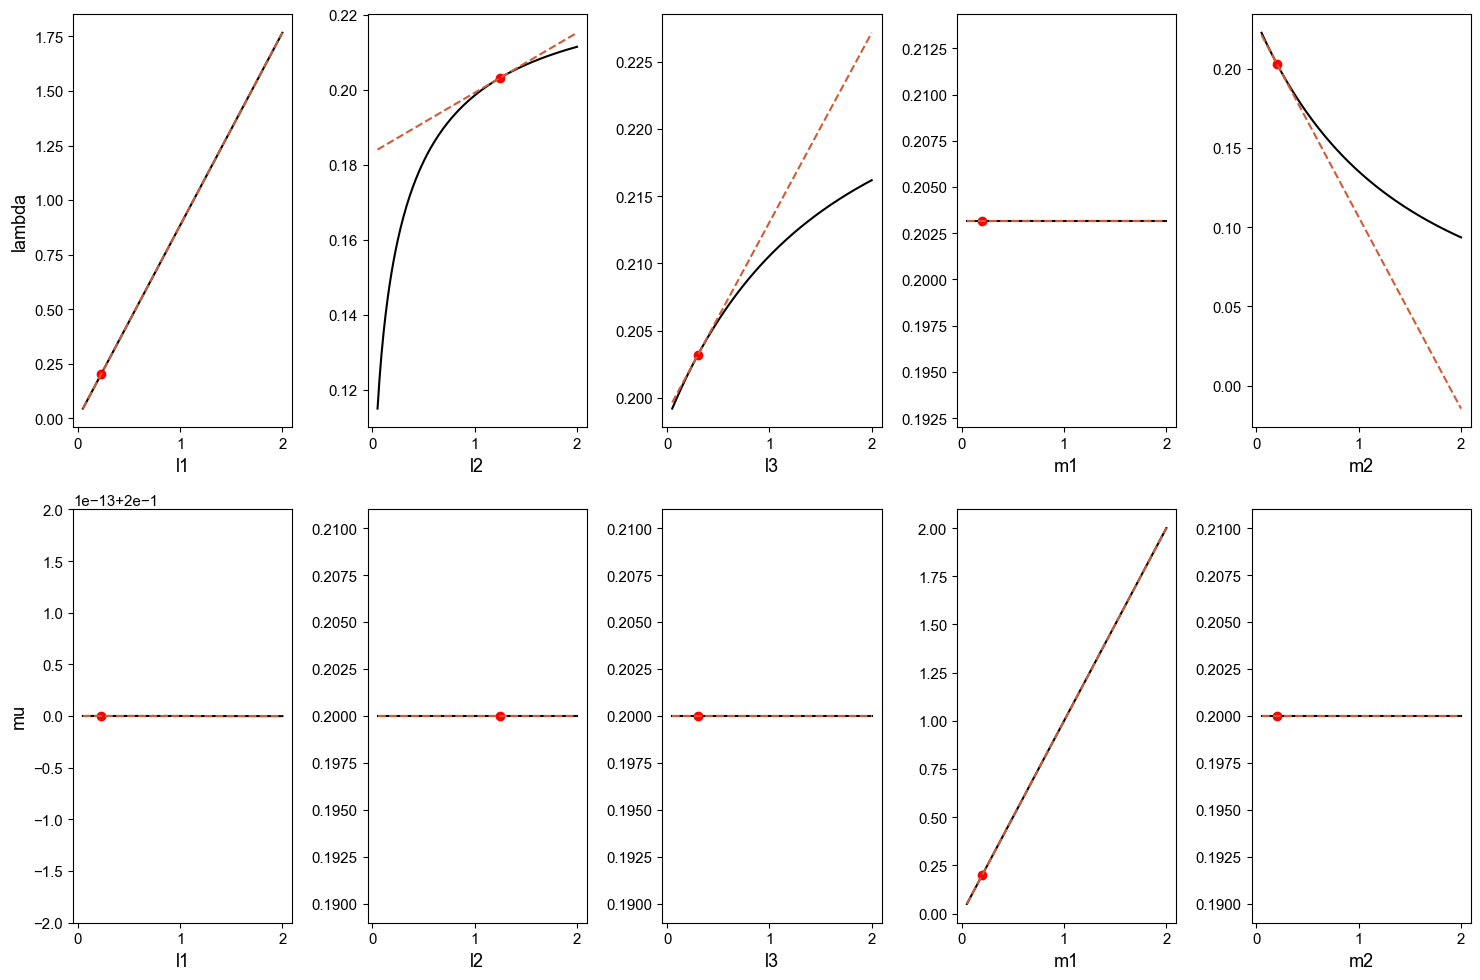

In [174]:
fig, axes = plt.subplots(2,5,figsize = (15,10))
param = dict(l1 = 0.23, l2 = 1.25, l3 = 0.3, m1 = 0.2, m2 = 0.2)
parnames = ['l1', 'l2', 'l3', 'm1', 'm2']
rate_names = ['lambda', 'mu']
def analog_bd(i_bd, l1, l2, l3, m1, m2):
    return PBD_analog.analog_BD_rates(l1, l2, l3, m1, m2)[i_bd]

# Check derivatives
for i_bd in (0,1):
    for i_pbd in range(5):
        
        par_vary = parnames[i_pbd]
        print('d {} / d {}'.format(rate_names[i_bd], par_vary))
        analyt_dfdx = jacobian_analog_bd(i_bd, i_pbd, **param)
        print("Analytical partial derivative : " + str(analyt_dfdx))

        other_param = param.copy()
        other_param.pop(par_vary)

        def f(x):
            return analog_bd(i_bd = i_bd, **{par_vary : x}, **other_param)
        x0 = param[par_vary]
        x = np.linspace(0.05, 2, 200)
        y =  f(x)

        y0 = f(x0)
        ax = axes[i_bd, i_pbd]
        ax.plot(x, y)
        ax.plot([x0], [y0], ls = "", marker = "o", color = "red")

        # derivative
        dydx0 = derivative(f, x0, dx = 0.001)
        #dydx = np.diff(y) / np.diff(x)
        #i = np.argmax(x > x0)
        #dydx0 = dydx[i]
        print("Numerical partial derivative  : "+str(dydx0))

        #ax.plot(x, y0 + (x-x0)*dydx0, ls = ":")
        ax.plot(x, y0 + (x-x0)*analyt_dfdx, ls = "--");
        ax.set_xlabel(par_vary)

axes[0,0].set_ylabel(rate_names[0])
axes[1,0].set_ylabel(rate_names[1])

C:\Users\pveron\AppData\Local\Temp\ipykernel_1180\2464688220.py:37: UserWarning: No contour levels were found within the data range.
  cont = ax.contour(l1, l2, Z, colors = "k", levels = 5)
C:\Users\pveron\AppData\Local\Temp\ipykernel_1180\2464688220.py:43: UserWarning: No contour levels were found within the data range.
  cont = ax_r.contour(l1, l2, Z/F, colors = "k", levels = 5)


Text(0.5, 0.98, 'Relative influence of the PBD parameters on the BD equivalent constant rates')

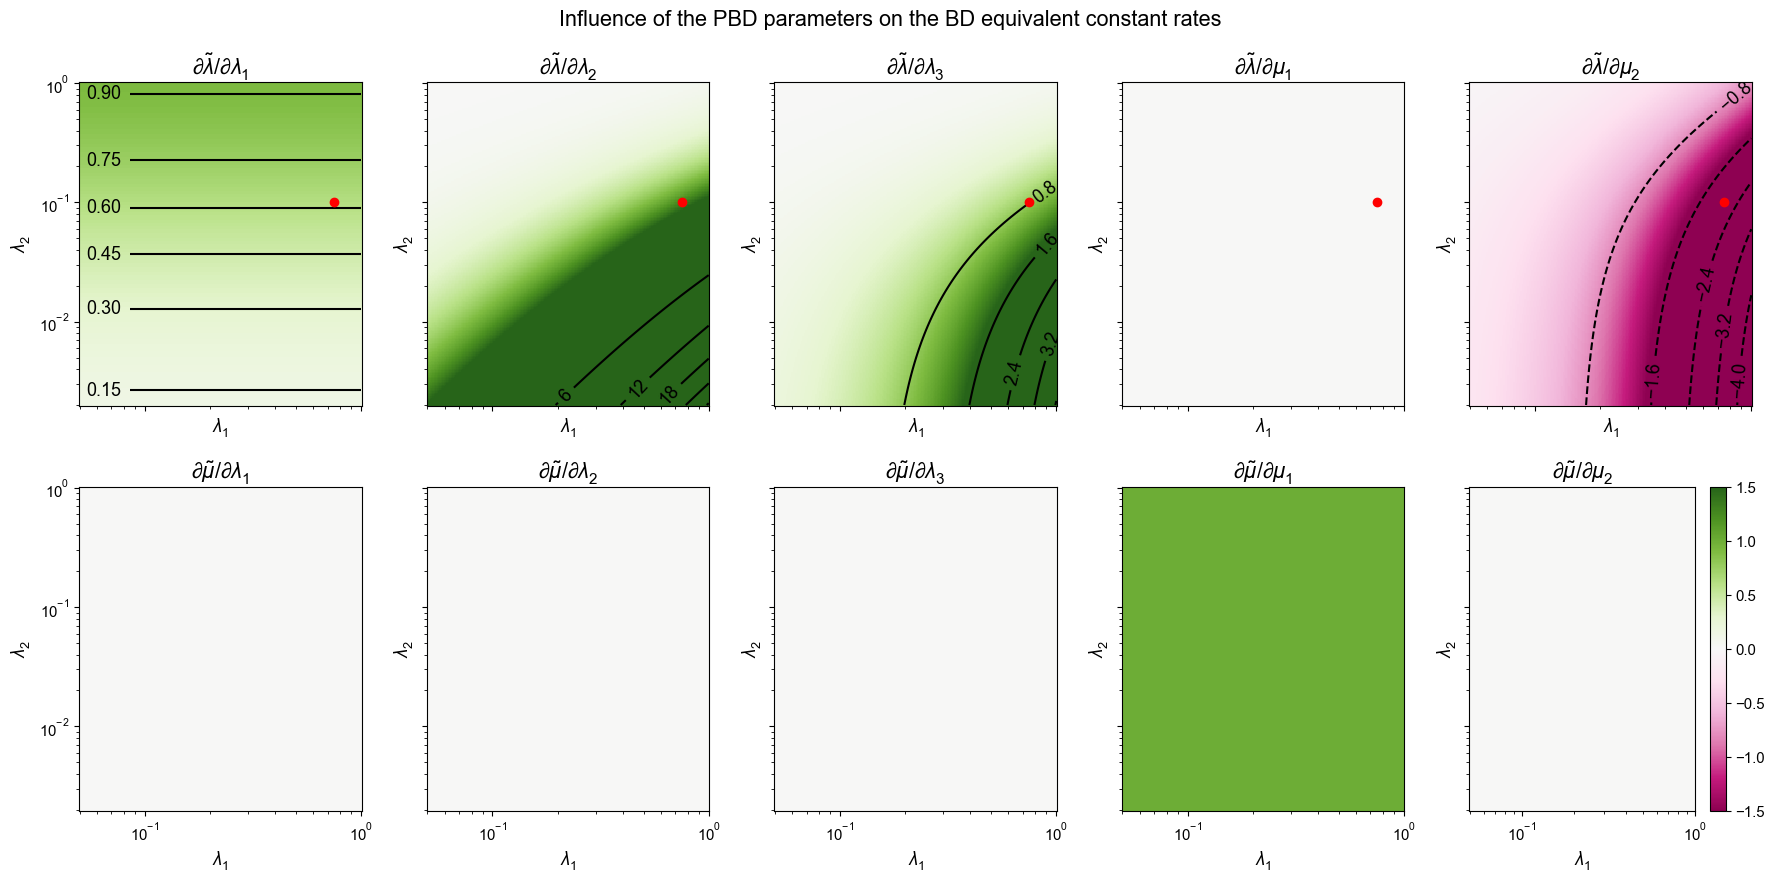

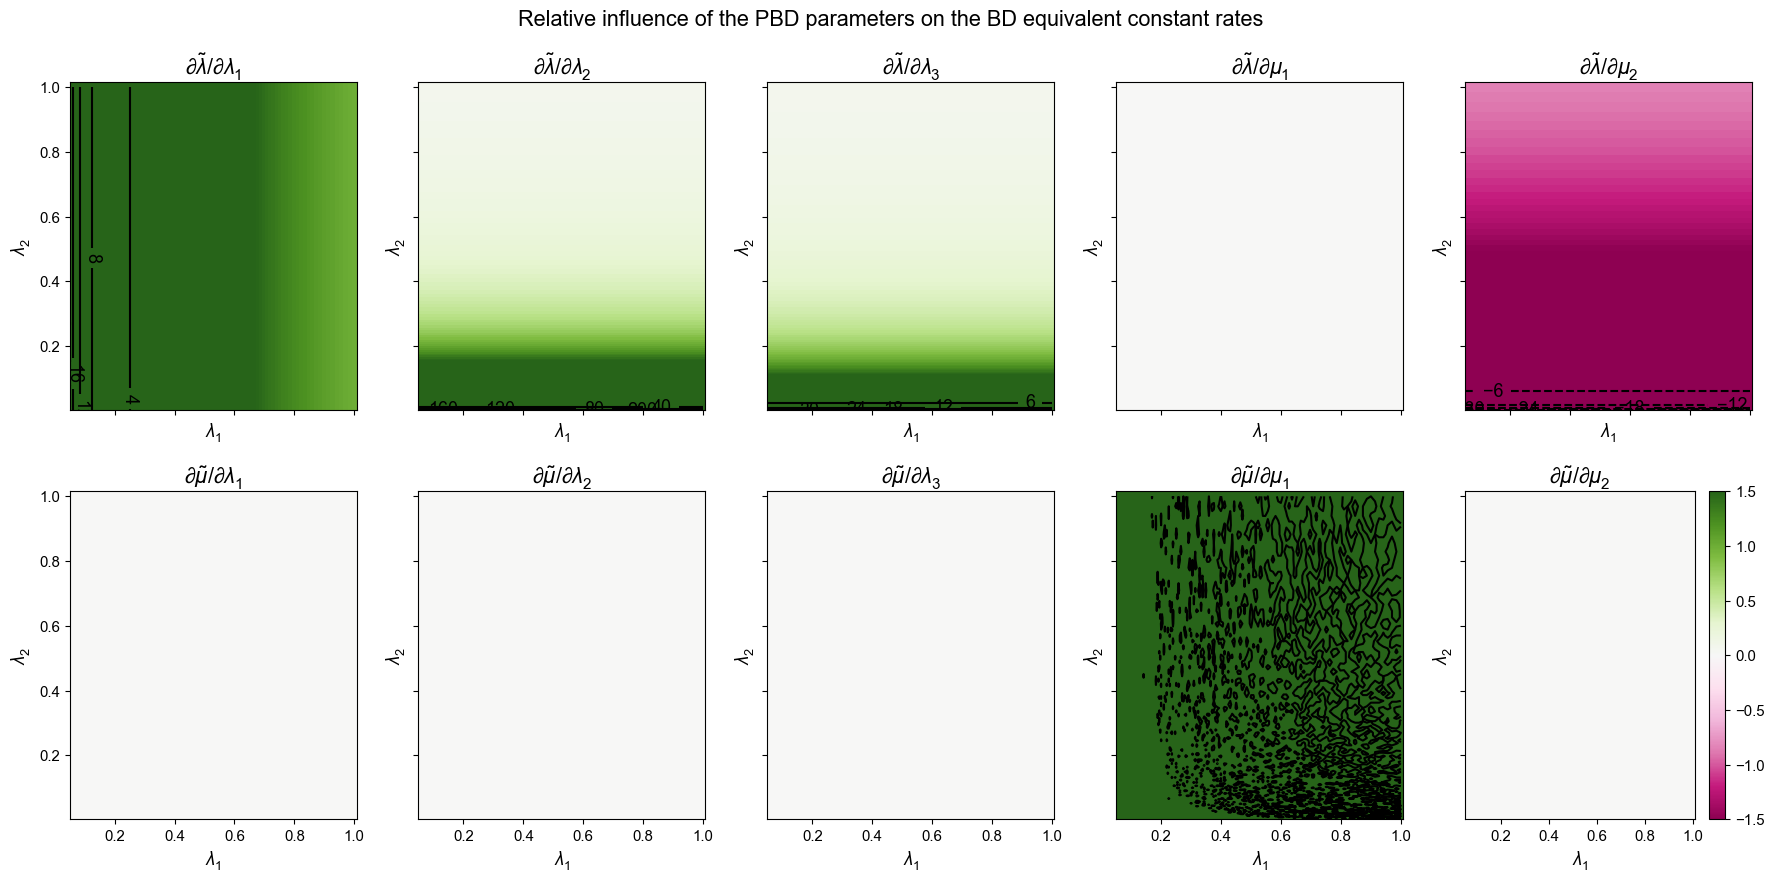

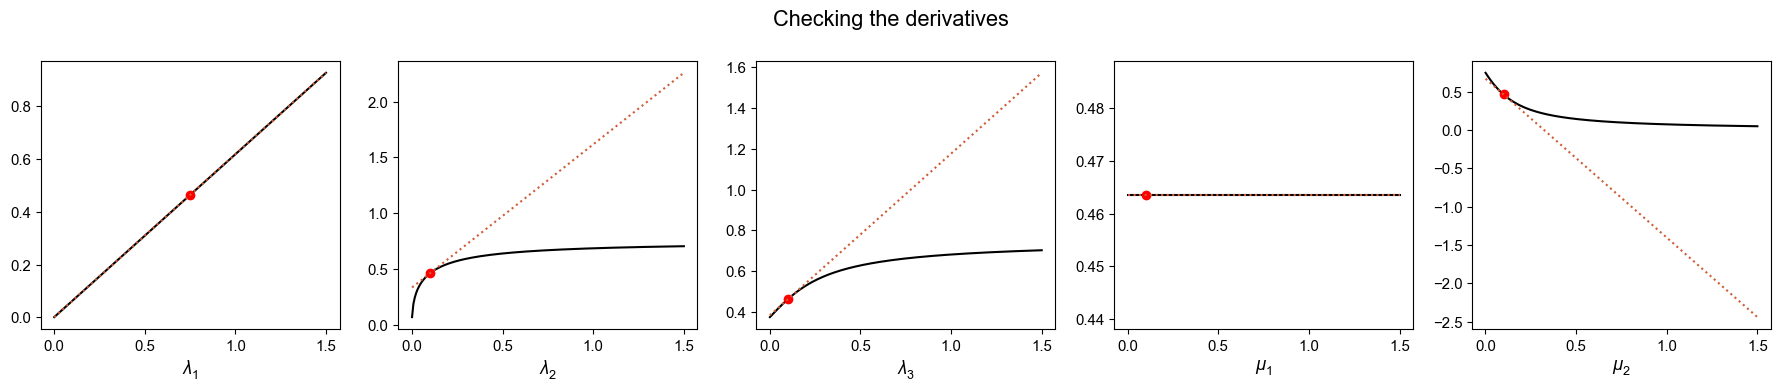

In [183]:
fig, axes = plt.subplots(2, 5,figsize = (18,9), sharex=True, sharey=True)
fig_r, axes_r = plt.subplots(2, 5,figsize = (18,9), sharex=True, sharey=True)
fig2, axes2 = plt.subplots(1, 5, figsize = (18,4))
bd_names = ["\\lambda", "\\mu"]
pbd_names = ["\\lambda_1", "\\lambda_2", "\\lambda_3", "\\mu_1", "\\mu_2"]
pbd_args = ['l1', 'l2', 'l3', 'm1', 'm2']
l1 = np.geomspace(0.05,1.0,200)
l2 = np.geomspace(0.002,1.0,200)
par = dict(l3 = 0.1, m1 = 0.1, m2 = 0.1)

example = (0.75, 0.1)
default = dict(l1 = example[0], l2 = example[1], **par)
y0 = PBD_analog.analog_BD_rates(**default)[0]

colormap = dict(cmap = "PiYG", vmin = -1.5, vmax = 1.5)

#levels = np.arange(0,1.6,0.1)


varJac = np.zeros((2, 5, len(l2), len(l1)))

for i_bd in (0,1):
    for i_pbd in range(5):
        Z = np.zeros((len(l2), len(l1)))
        F = np.zeros_like(Z)
        for i1 in range(len(l1)):
            for i2 in range(len(l2)):
                Z[i2, i1] = jacobian_analog_bd(i_bd, i_pbd, l1[i1], l2[i2], **par)
                varJac[i_bd, i_pbd, i2, i1] = Z[i2, i1]
                F[i2, i1] = PBD_analog.analog_BD_rates(l1[i1], l2[i2], **par)[i_bd]
                ax = axes[i_bd, i_pbd]
        ax = axes[i_bd, i_pbd]
        ax.set_xscale("log")
        ax.set_yscale("log")

        im = ax.pcolormesh(l1, l2, Z, **colormap)
        cont = ax.contour(l1, l2, Z, colors = "k", levels = 5)
        ax.clabel(cont, cont.levels)

        # relative diff
        ax_r = axes_r[i_bd, i_pbd]
        im_r = ax_r.pcolormesh(l1, l2, Z/F, **colormap)
        cont = ax_r.contour(l1, l2, Z/F, colors = "k", levels = 5)
        ax_r.clabel(cont, cont.levels)
        
        for axx in (ax, ax_r):
            axx.set_title("$\\partial \\tilde{} / \\partial{}$".format(bd_names[i_bd], pbd_names[i_pbd]))
            axx.set_xlabel("${}$".format(pbd_names[0]))
            axx.set_ylabel("${}$".format(pbd_names[1]))
        
        if i_bd == 0:
            ax.plot([example[0]], [example[1]], ls = "", marker = "o", color = "red")
            x0 = default[pbd_args[i_pbd]] 
            x = np.linspace(0.001, 1.5, 200)

            param = default.copy()
            param[pbd_args[i_pbd]] = x
            y = PBD_analog.analog_BD_rates(**param)[0]

            axes2[i_pbd].plot(x, y)
            axes2[i_pbd].plot([x0],[y0], ls = "", marker = "o", color = "red")

            # derivative
            dfdx = jacobian_analog_bd(0, i_pbd, **default)
            axes2[i_pbd].plot(x, y0 + dfdx*(x-x0), ls = ":")

            axes2[i_pbd].set_xlabel("${}$".format(pbd_names[i_pbd]))

fig2.suptitle("Checking the derivatives")

fig.colorbar(im)
fig.suptitle("Influence of the PBD parameters on the BD equivalent constant rates")

fig_r.colorbar(im_r)
fig_r.suptitle("Relative influence of the PBD parameters on the BD equivalent constant rates")

In [189]:
# relative values of the partial derivatives 
sumJac = np.sum(np.power(varJac, 2), axis = 1)
relatJac = np.zeros_like(varJac)
for i_pbd in range(5):


(2, 1000, 200)

Now let us consider a simplified case with 
$$b = \lambda_1 = \lambda_3$$
and
$$e = \mu_1 = \mu_2.$$

We can now consider the partial derivatives (chain rule):
\begin{align}
\frac{\partial \tilde\lambda}{\partial b}  &= \frac{\partial \tilde\lambda}{\partial \lambda_1}(b, \lambda_2, b, e, e) + \frac{\partial \tilde\lambda}{\partial \lambda_3}(b, \lambda_2, b, e, e) 
\end{align}

Since 
$$\frac{\partial \tilde\lambda}{\partial  \mu_1} = 0$$ 
we simply have 
$$\frac{\partial \tilde\lambda}{\partial  e} = \frac{\partial \tilde\lambda}{\partial \mu_2}$$


For the death rate we have simply
$$\frac{\partial \tilde\mu}{\partial  e} = 1 \quad \text{and} \quad \frac{\partial \tilde\mu}{\partial b} =  \frac{\partial \tilde\mu}{\partial \lambda_2}=  0 $$

In [176]:
def partial_birth_b(b, l2, e):
    return partial_birth_l1(b, l2, b, e, e) + partial_birth_l3(b, l2, b, e, e)

def partial_birth_e(b, l2, e):
    return partial_birth_m2(b, l2, b, e, e)

def simp_jacobian_analog_bd(i_bd, i_simp_pbd, b, l2, e):
    if i_bd == 0:
        if i_simp_pbd == 0:
            return partial_birth_b(b, l2, e)
        elif i_simp_pbd == 1:
            return partial_birth_l2(b, l2, b, e, e)
        elif i_simp_pbd == 2:
            return partial_birth_e(b, l2, e)
    elif i_bd == 1:
        if i_simp_pbd == 2:
            return 1.0
        elif i_simp_pbd in (0,1):
            return 0.0
    raise ValueError("i_bd must be 0 or 1 and i_simp_pbd must be in [0,1,2].")

In [177]:
def simp_birth(b, l2, e):
    return PBD_analog.analog_BD_rates(b, l2, b, e, e)[0]

C:\Users\pveron\AppData\Local\Temp\ipykernel_1180\397765232.py:38: UserWarning: No contour levels were found within the data range.
  cont = ax.contour(b, l2, Z, colors = "k", levels = 5)


Text(0.5, 0.98, 'Influence of the PBD parameters on the BD equivalent constant rates')

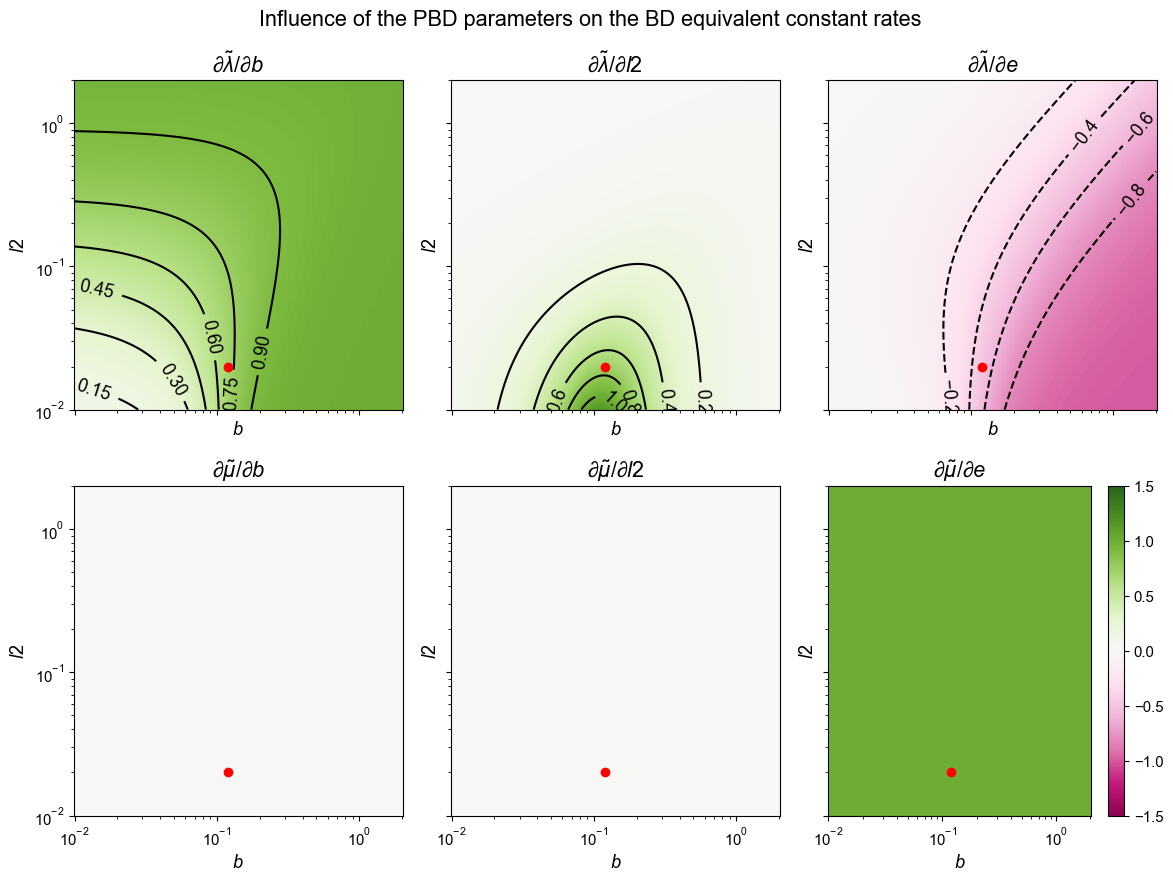

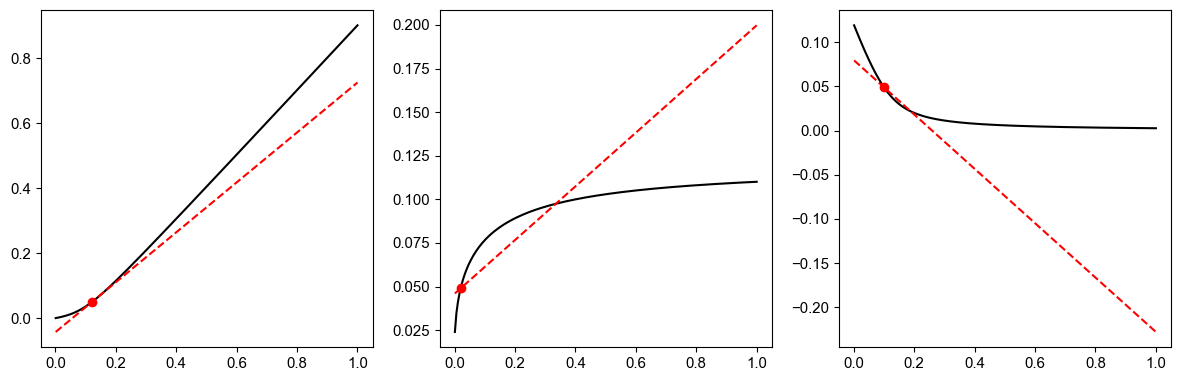

In [178]:
fig, axes = plt.subplots(2, 3,figsize = (12,9), sharex=True, sharey=True)
fig2, axes2 = plt.subplots(1, 3, figsize = (12,4))
bd_names = ["\\lambda", "\\mu"]
simp_pbd_names = ["b", "l2", "e"]

b = np.geomspace(0.01,2.0,200)
l2 = np.geomspace(0.01,2.0,400)
par = dict(e = 0.1)

example = (0.12, 0.02)
default = dict(b = example[0], l2 = example[1], **par)
y0 = simp_birth(*example, **par)
example_deriv = np.zeros((2, 3))
colormap = dict(cmap = "PiYG", vmin = -1.5, vmax = 1.5)

#levels = np.arange(0,1.6,0.1)


i_pbd = -1

for i_bd in (0,1):
    for i_simp_pbd in range(3):
        par_vary = simp_pbd_names[i_simp_pbd]
        ax = axes[i_bd, i_simp_pbd]
        
        ax.set_xscale("log")
        ax.set_yscale("log")
        
        Z = np.zeros((len(l2), len(b)))

        for i1 in range(len(b)):
            for i2 in range(len(l2)):
                Z[i2, i1] = simp_jacobian_analog_bd(i_bd, i_simp_pbd, b = b[i1], l2 = l2[i2], **par)

        
        #cont = ax.contourf(l1, l2, Z, cmap = cmap, norm = norm, levels = levels)
        im = ax.pcolormesh(b, l2, Z, **colormap)
        cont = ax.contour(b, l2, Z, colors = "k", levels = 5)
        ax.clabel(cont, cont.levels)

        ax.plot([example[0]], [example[1]], ls = "", marker = "o", color = "red")
        example_deriv[i_bd, i_simp_pbd] = simp_jacobian_analog_bd(i_bd, i_simp_pbd, b = example[0], l2 = example[0], **par)

        ax.set_title("$\\partial \\tilde{} / \\partial {}$".format(bd_names[i_bd], par_vary))
        ax.set_xlabel("${}$".format(simp_pbd_names[0]))
        ax.set_ylabel("${}$".format(simp_pbd_names[1]))

        # Plot actual dynamics 
        if i_bd == 0:
            x = np.linspace(0.001, 1.0, 200)
            param = default.copy()
            x0 = default[par_vary]
            param[par_vary] = x
            y = simp_birth(**param)

            axes2[i_simp_pbd].plot(x,y)
            axes2[i_simp_pbd].plot([x0], [y0], ls = "", marker = "o", color = "red")

            axes2[i_simp_pbd].plot(x, y0 + example_deriv[0, i_simp_pbd]*(x-x0), ls = "--", color = "red")


fig.colorbar(im)
fig.suptitle("Influence of the PBD parameters on the BD equivalent constant rates")

In [179]:
param

{'b': 0.12,
 'l2': 0.02,
 'e': array([0.001     , 0.0060201 , 0.0110402 , 0.0160603 , 0.0210804 ,
        0.0261005 , 0.0311206 , 0.0361407 , 0.0411608 , 0.0461809 ,
        0.05120101, 0.05622111, 0.06124121, 0.06626131, 0.07128141,
        0.07630151, 0.08132161, 0.08634171, 0.09136181, 0.09638191,
        0.10140201, 0.10642211, 0.11144221, 0.11646231, 0.12148241,
        0.12650251, 0.13152261, 0.13654271, 0.14156281, 0.14658291,
        0.15160302, 0.15662312, 0.16164322, 0.16666332, 0.17168342,
        0.17670352, 0.18172362, 0.18674372, 0.19176382, 0.19678392,
        0.20180402, 0.20682412, 0.21184422, 0.21686432, 0.22188442,
        0.22690452, 0.23192462, 0.23694472, 0.24196482, 0.24698492,
        0.25200503, 0.25702513, 0.26204523, 0.26706533, 0.27208543,
        0.27710553, 0.28212563, 0.28714573, 0.29216583, 0.29718593,
        0.30220603, 0.30722613, 0.31224623, 0.31726633, 0.32228643,
        0.32730653, 0.33232663, 0.33734673, 0.34236683, 0.34738693,
        0.35240704

Text(0.5, 0.98, 'Relative influence of the PBD parameters on the BD equivalent constant rates')

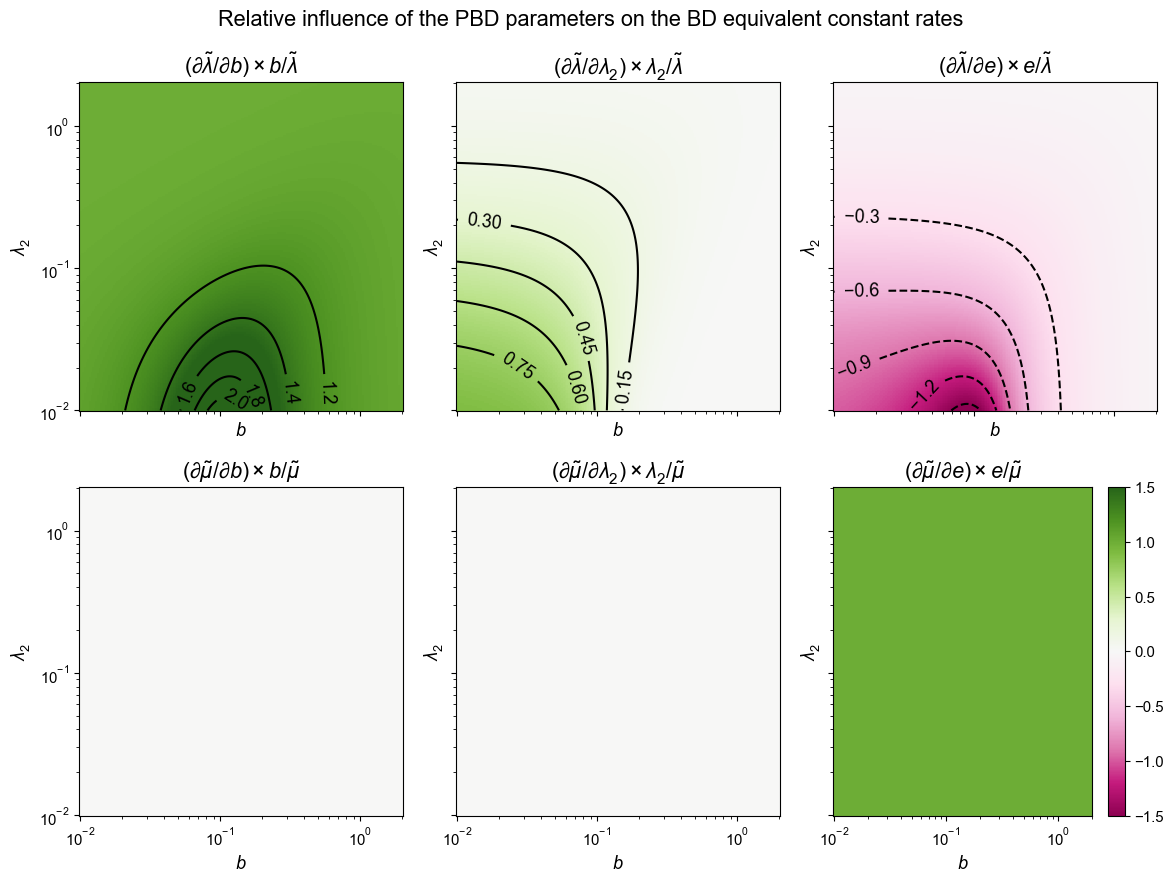

In [180]:
fig, axes = plt.subplots(2, 3,figsize = (12,9), sharex=True, sharey=True)

bd_names = ["\\lambda", "\\mu"]
simp_pbd_names = ["b", "\\lambda_2", "e"]

b = np.geomspace(0.01,2.0,200)
l2 = np.geomspace(0.01,2.0,200)
par = dict(e = 0.1)


colormap = dict(cmap = "PiYG", vmin = -1.5, vmax = 1.5)

#levels = np.arange(0,1.6,0.1)


for i_bd in (0,1):
    for i_simp_pbd in range(3):
        ax = axes[i_bd, i_simp_pbd]
        
        ax.set_xscale("log")
        ax.set_yscale("log")
        
        Z = np.zeros((len(l2), len(b)))

        for i1 in range(len(b)):
            for i2 in range(len(l2)):
                dfdx = simp_jacobian_analog_bd(i_bd, i_simp_pbd, b = b[i1], l2 = l2[i2], **par)
                y =  PBD_analog.analog_BD_rates(b[i1], l2[i2], b[i1], par['e'], par['e'])[i_bd]
                x = [b[i1], l2[i2], par['e']][i_simp_pbd]
                cv = dfdx * x / y
                Z[i2, i1] = cv
        
        #cont = ax.contourf(l1, l2, Z, cmap = cmap, norm = norm, levels = levels)
        im = ax.pcolormesh(b, l2, Z, **colormap)
        if i_bd == 0:
            cont = ax.contour(b, l2, Z, colors = "k", levels = 5)
            ax.clabel(cont, cont.levels)

        ax.set_title("$(\\partial \\tilde{y} / \\partial {x}) \\times {x} /  \\tilde{y}$".format(y = bd_names[i_bd], x = simp_pbd_names[i_simp_pbd]))
        ax.set_xlabel("${}$".format(simp_pbd_names[0]))
        ax.set_ylabel("${}$".format(simp_pbd_names[1]))

fig.colorbar(im)
fig.suptitle("Relative influence of the PBD parameters on the BD equivalent constant rates")